In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data['time'].value_counts()

250    7
187    7
10     6
186    6
107    6
      ..
97     1
96     1
86     1
77     1
285    1
Name: time, Length: 148, dtype: int64

In [6]:
num = data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]

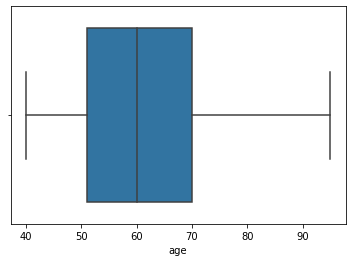

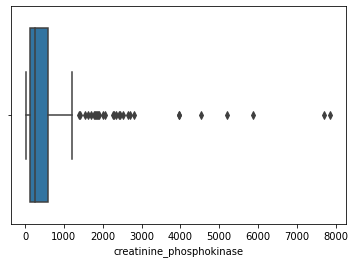

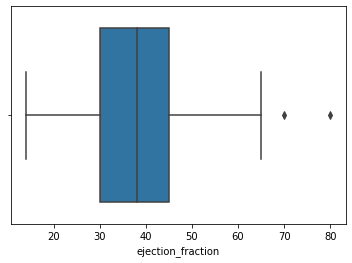

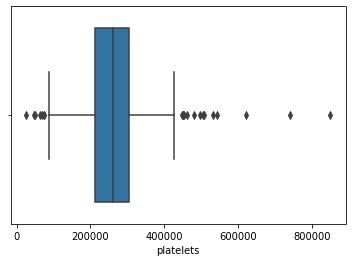

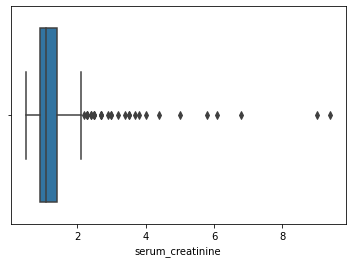

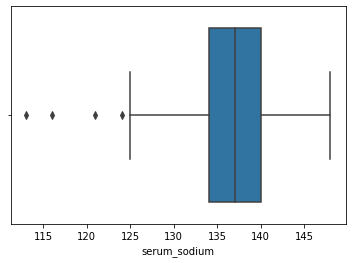

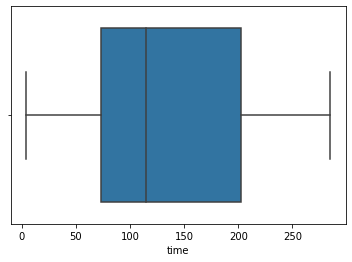

In [7]:
for col in num.columns:
    plt.figure()
    sns.boxplot(num[col])

In [8]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
for col in num.columns:
    q1 = num[col].quantile(0.25)
    q3 = num[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    num[col] = np.where(num[col]<lower,lower,num[col])
    num[col] = np.where(num[col]>upper,upper,num[col])

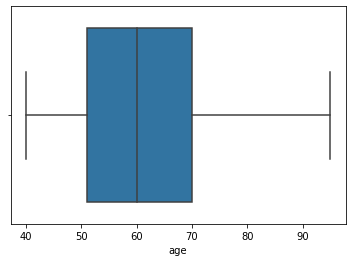

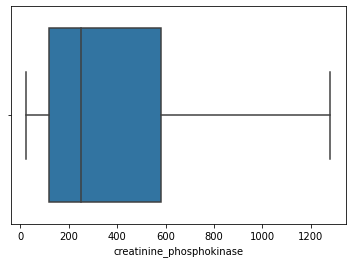

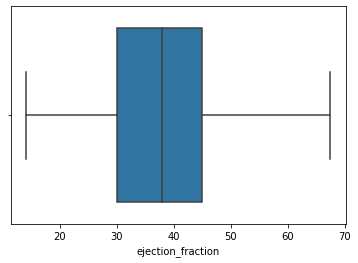

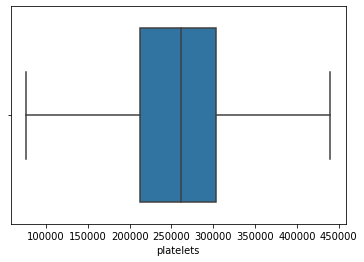

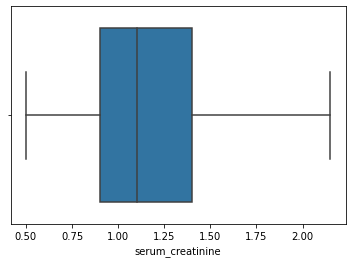

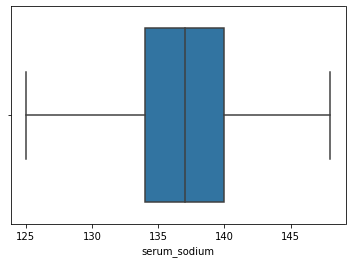

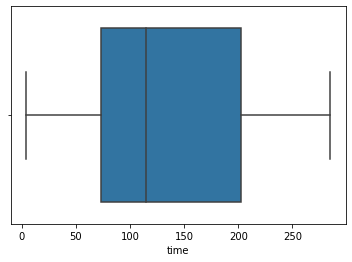

In [10]:
for col in num.columns:
    plt.figure()
    sns.boxplot(num[col])

In [14]:
num.skew()

age                         0.423062
creatinine_phosphokinase    1.070601
ejection_fraction           0.472927
platelets                   0.242475
serum_creatinine            0.905297
serum_sodium               -0.321190
time                        0.127803
dtype: float64

In [17]:
char = data[['anaemia','diabetes','high_blood_pressure','smoking','sex']]

In [18]:
char.skew()

anaemia                0.278261
diabetes               0.333929
high_blood_pressure    0.626732
smoking                0.770349
sex                   -0.626732
dtype: float64

In [19]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, strategy='quantile',encode='ordinal')
num_binned = pd.DataFrame(kbins.fit_transform(num), columns = num.columns)

In [20]:
Y = data[['DEATH_EVENT']]

In [21]:
num_Y = pd.concat([num_binned,Y], axis = 1)

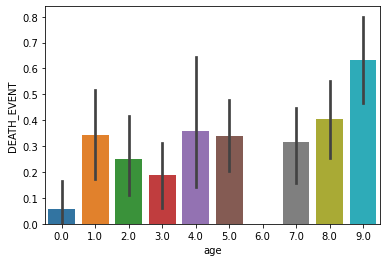

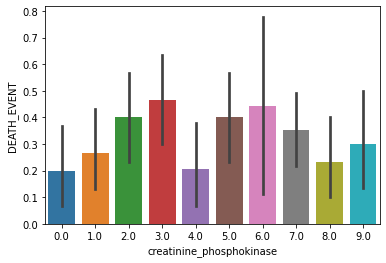

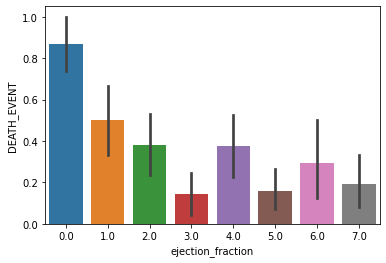

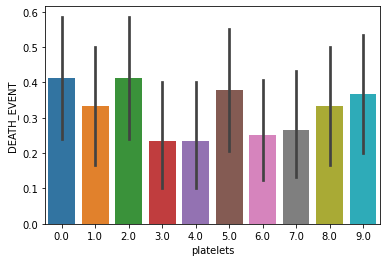

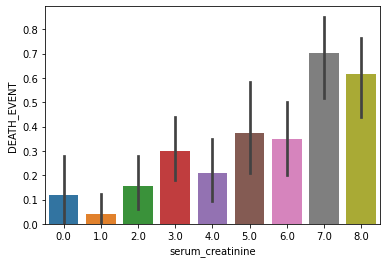

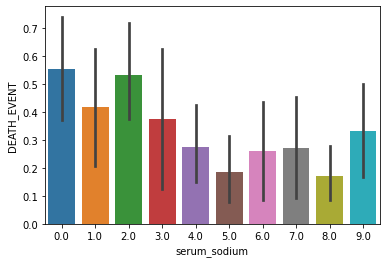

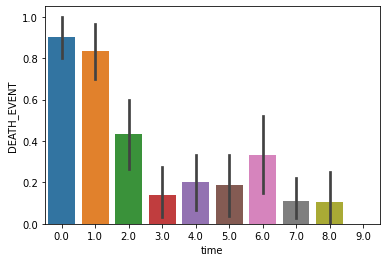

In [22]:
for column in num_binned.columns:
    plt.figure()
    sns.barplot(x = column, y = "DEATH_EVENT", data = num_Y)

In [23]:
char_Y = pd.concat([char,Y], axis = 1)

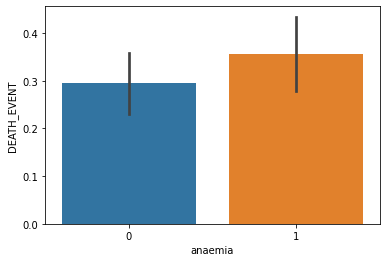

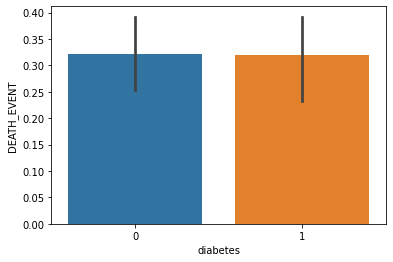

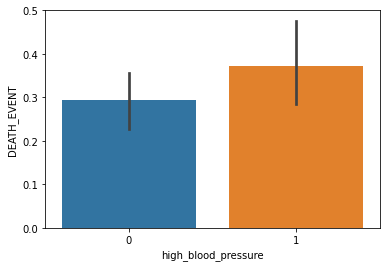

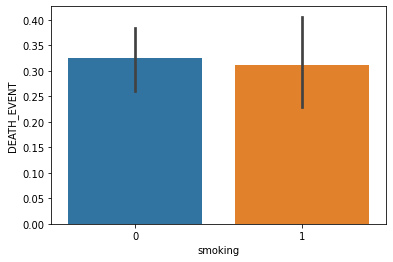

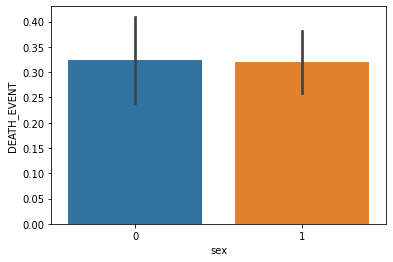

In [24]:
for column in char.columns:
    plt.figure()
    sns.barplot(x = column, y = "DEATH_EVENT", data = char_Y)

In [25]:
char.drop(['sex','diabetes'], axis = 1, inplace = True)

In [26]:
X = pd.concat([num,char], axis = 1)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

In [28]:
X_std.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure,smoking
0,1.192945,0.410040,-1.545801,0.071750,1.514665,-1.649172,-1.629502,-0.871105,1.359272,-0.687682
1,-0.491279,2.224599,-0.002867,0.051564,-0.306161,-0.175024,-1.603691,-0.871105,-0.735688,-0.687682
2,0.350833,-0.723004,-1.545801,-1.194509,0.149046,-1.894864,-1.590785,-0.871105,-0.735688,1.454161
3,-0.912335,-0.813959,-1.545801,-0.604408,1.514665,0.070667,-1.590785,1.147968,-0.735688,-0.687682
4,0.350833,-0.686622,-1.545801,0.833964,2.083673,-2.877629,-1.577879,1.147968,-0.735688,-0.687682


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)
log_reg.score(X_train,Y_train)

0.8516746411483254

In [33]:
log_reg.score(X_test,Y_test)

0.7777777777777778

In [34]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))

0.84
0.5675675675675675


In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150, min_samples_split=10, min_samples_leaf=5, max_depth=10, bootstrap=False)
rfc.fit(X_train,Y_train)
Y_pred_rfc = rfc.predict(X_test)
print(rfc.score(X_train,Y_train))
print(rfc.score(X_test,Y_test))
print(precision_score(Y_test,Y_pred_rfc))
print(recall_score(Y_test,Y_pred_rfc))

0.9473684210526315
0.7666666666666667
0.8076923076923077
0.5675675675675675
